# Kredi Kartƒ± Dolandƒ±rƒ±cƒ±lƒ±k Tespitinde Makine √ñƒürenmesi: Dengesiz Veri ile M√ºcadele ve Y√ºksek Performanslƒ± Model Geli≈ütirme

Bu proje, Akbank Makine √ñƒürenmesi Bootcamp kapsamƒ±nda ger√ßekle≈ütirilmi≈ü olup, g√∂zetimli √∂ƒürenme teknikleri kullanƒ±larak kredi kartƒ± i≈ülemlerinde dolandƒ±rƒ±cƒ±lƒ±ƒüƒ± tespit etmeye y√∂nelik bir sƒ±nƒ±flandƒ±rma sisteminin geli≈ütirilmesini ama√ßlamaktadƒ±r.

Veri seti, anonimle≈ütirilmi≈ü kredi kartƒ± i≈ülemlerinden olu≈ümakta ve her i≈ülem i√ßin, dolandƒ±rƒ±cƒ±lƒ±k olup olmadƒ±ƒüƒ±nƒ± g√∂steren Class adlƒ± ikili bir etiket i√ßermektedir. Sƒ±nƒ±flar arasƒ±nda ciddi bir dengesizlik mevcuttur; bu nedenle projenin √∂nemli bir odak noktasƒ± sƒ±nƒ±f dengesizliƒüini ele almak ve azƒ±nlƒ±k sƒ±nƒ±fƒ± doƒüru ≈üekilde tahmin edebilen modeller geli≈ütirmektir.

![](https://miro.medium.com/v2/resize:fit:640/1*vEyvMNBTQIUn_pZFJSpXtQ.png)

### Proje Adƒ±mlarƒ±

1. **Gerekli K√ºt√ºphaneler**

2. **Veri Y√ºkleme ve ƒ∞lk ƒ∞nceleme**

3. **Sƒ±nƒ±f Dengesizliƒüi ƒ∞√ßin Downsampling**

4. **Eƒüitim-Test B√∂lme ve Normalizasyon**

5. **Lojistik Regresyon**

6. **Random Forest + Hiperparametre Ayarƒ±**

7. **√ñzellik √ñnem Dereceleri**

8. **Karƒ±≈üƒ±klƒ±k Matrisleri**

9. **Precision-Recall Eƒürisi**

10. **BONUS: DBSCAN ile G√∂zetimsiz √ñƒürenme**

**Sonu√ß ve Yorum**

**Ger√ßek Hayattaki Uygulamalar**

**Projenin Geli≈ütirme Potansiyeli**

# üìå 1. Gerekli K√ºt√ºphaneler
Bu b√∂l√ºmde, proje boyunca ihtiya√ß duyulan Python k√ºt√ºphaneleri import edilmi≈ütir.
Kullanƒ±lan k√ºt√ºphaneler arasƒ±nda:

* Pandas ve NumPy (veri i≈üleme),

* Matplotlib ve Seaborn (g√∂rselle≈ütirme),

* Scikit-learn (makine √∂ƒürenmesi modelleri, deƒüerlendirme metrikleri, veri b√∂lme ve √∂n i≈üleme),

* DBSCAN ve PCA (g√∂zetimsiz √∂ƒürenme ve boyut indirgeme) yer almaktadƒ±r.

Bu k√ºt√ºphaneler, makine √∂ƒürenmesi s√ºrecinin her a≈üamasƒ±nda destekleyici rol √ºstlenir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from sklearn.utils import resample

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# üìå 2. Veri Y√ºkleme ve ƒ∞lk ƒ∞nceleme
Bu adƒ±mda Kaggle platformu √ºzerinden saƒülanan Credit Card Fraud Detection veri seti y√ºklenmi≈ütir.
Veri seti, kredi kartƒ± i≈ülemlerine ait anonimle≈ütirilmi≈ü √∂zellikler (V1-V28) ve her i≈ülemin dolandƒ±rƒ±cƒ±lƒ±k olup olmadƒ±ƒüƒ±nƒ± g√∂steren Class s√ºtununu i√ßermektedir.

ƒ∞lk analizde, Class s√ºtunundaki dengesizlik dikkat √ßekmektedir:

* 284,315 adet normal i≈ülem (Class=0)

* Sadece 492 adet dolandƒ±rƒ±cƒ±lƒ±k vakasƒ± (Class=1)

Bu dengesizlik, doƒürudan modelin √∂ƒürenme ba≈üarƒ±mƒ±nƒ± etkileyebileceƒüi i√ßin √∂zel stratejiler uygulanacaktƒ±r.

In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
print("Orijinal Sƒ±nƒ±f Daƒüƒ±lƒ±mƒ±:")
print(df['Class'].value_counts())

Orijinal Sƒ±nƒ±f Daƒüƒ±lƒ±mƒ±:
Class
0    284315
1       492
Name: count, dtype: int64


# üìå 3. Sƒ±nƒ±f Dengesizliƒüi ƒ∞√ßin Downsampling
Veri setindeki ciddi sƒ±nƒ±f dengesizliƒüini gidermek i√ßin downsampling y√∂ntemi uygulanmƒ±≈ütƒ±r.
Azƒ±nlƒ±k sƒ±nƒ±f (Class=1) sayƒ±sƒ± kadar, √ßoƒüunluk sƒ±nƒ±ftan (Class=0) rastgele √∂rnek alƒ±narak yeni, dengeli bir veri seti olu≈üturulmu≈ütur.

Bu yakla≈üƒ±m sayesinde:

* Model, her iki sƒ±nƒ±fƒ± da e≈üit √∂nemle √∂ƒürenebilir.

* Azƒ±nlƒ±k sƒ±nƒ±fƒ± ihmal edilmez.

* A≈üƒ±rƒ± √∂ƒürenme (overfitting) riskine kar≈üƒ± daha kontroll√º bir √∂ƒürenme ortamƒ± olu≈üturulur.

In [3]:
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 1]

# √ñrn: 1:1 oranƒ±nda dengeleme
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced = df_balanced.sample(frac=1, random_state=42)  # shuffle

print("\nDownsampling Sonrasƒ± Sƒ±nƒ±f Daƒüƒ±lƒ±mƒ±:")
print(df_balanced['Class'].value_counts())


Downsampling Sonrasƒ± Sƒ±nƒ±f Daƒüƒ±lƒ±mƒ±:
Class
1    492
0    492
Name: count, dtype: int64


# üìå 4. Eƒüitim-Test B√∂lme ve Normalizasyon
Bu b√∂l√ºmde dengelenmi≈ü veri seti X (√∂zellikler) ve y (etiket) olarak ayrƒ±lmƒ±≈ü ve train_test_split fonksiyonu ile %80 eƒüitim - %20 test olacak ≈üekilde ikiye b√∂l√ºnm√º≈üt√ºr.
Sƒ±nƒ±f oranlarƒ±nƒ±n korunmasƒ± amacƒ±yla stratify=y parametresi kullanƒ±lmƒ±≈ütƒ±r.

Ayrƒ±ca, Amount ve Time s√ºtunlarƒ± farklƒ± √∂l√ßeklerde deƒüerlere sahip olduƒüundan, StandardScaler ile standart normal daƒüƒ±lƒ±ma d√∂n√º≈üt√ºr√ºlerek modelin √∂ƒürenme performansƒ± artƒ±rƒ±lmƒ±≈ütƒ±r.

In [4]:
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

scaler = StandardScaler()
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

# üìå 5. Lojistik Regresyon
ƒ∞lk sƒ±nƒ±flandƒ±rma modeli olarak Lojistik Regresyon tercih edilmi≈ütir.
Bu model, ikili sƒ±nƒ±flandƒ±rma problemlerinde yaygƒ±n olarak kullanƒ±lƒ±r ve yorumlanabilirliƒüi y√ºksek bir y√∂ntemdir.

Model eƒüitildikten sonra:

* Precision, Recall, F1-score gibi metrikler hesaplanmƒ±≈ü,

* roc_auc_score ile modelin dolandƒ±rƒ±cƒ±lƒ±k sƒ±nƒ±fƒ±nƒ± ne kadar ayƒ±rt edebildiƒüi deƒüerlendirilmi≈ütir.

Sonu√ßlar olduk√ßa tatmin edici olup, dengelenmi≈ü veri sayesinde azƒ±nlƒ±k sƒ±nƒ±fƒ± ba≈üarƒ±yla tahmin edilmi≈ütir.

In [5]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print("\nLojistik Regresyon Sonu√ßlarƒ±:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Skoru:", roc_auc_score(y_test, y_prob_lr))


Lojistik Regresyon Sonu√ßlarƒ±:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        99
           1       0.98      0.93      0.95        98

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197

ROC AUC Skoru: 0.9785611214182642


# üìå 6. Random Forest + Hiperparametre Ayarƒ±
Daha karma≈üƒ±k bir model olan Random Forest uygulanmƒ±≈ütƒ±r.
Modelin performansƒ±nƒ± en √ºst d√ºzeye √ßƒ±karmak i√ßin GridSearchCV ile hiperparametre optimizasyonu yapƒ±lmƒ±≈ütƒ±r.

Test edilen parametreler:

* n_estimators (aƒüa√ß sayƒ±sƒ±)

* max_depth (maksimum derinlik)

* min_samples_split

* class_weight (sƒ±nƒ±f dengesizliƒüi i√ßin)

Sonu√ß olarak, optimize edilmi≈ü model y√ºksek doƒüruluk ve ROC AUC skorlarƒ± ile ba≈üarƒ±lƒ± performans g√∂stermi≈ütir.

In [6]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']  # dengesizlik i√ßin
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest Sonu√ßlarƒ±:")
print("En ƒ∞yi Parametreler:", grid_search.best_params_)
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Skoru:", roc_auc_score(y_test, y_prob_rf))


Random Forest Sonu√ßlarƒ±:
En ƒ∞yi Parametreler: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        99
           1       0.96      0.93      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197

ROC AUC Skoru: 0.9808286951144094


# üìå 7. √ñzellik √ñnem Dereceleri
Random Forest modeli, her bir √∂zelliƒüin karar verme s√ºrecine olan katkƒ±sƒ±nƒ± hesaplayarak √∂zellik √∂nem derecelerini saƒülar.

Bu b√∂l√ºmde modelin en √ßok √∂nem verdiƒüi √∂znitelikler g√∂rsellenmi≈ütir.
√ñrneƒüin: V14, V10 ve V12 √∂zellikleri dolandƒ±rƒ±cƒ±lƒ±k tahmininde kritik rol oynamaktadƒ±r.

Bu analiz, √∂zellikle gelecekteki veri toplama ve √∂zellik se√ßimi s√ºre√ßlerine ƒ±≈üƒ±k tutar.

In [7]:
feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("\n√ñzellik √ñnem Dereceleri:")
print(feature_importances)


√ñzellik √ñnem Dereceleri:
        importance
V14       0.177291
V10       0.112977
V12       0.105182
V4        0.103573
V17       0.099876
V3        0.056960
V11       0.055265
V16       0.050772
V2        0.039515
V9        0.028391
V7        0.020078
V21       0.016689
V8        0.011921
V18       0.010012
Amount    0.009718
V20       0.009610
V1        0.009480
V19       0.009472
V27       0.009282
V23       0.008847
V6        0.007800
V13       0.007241
V26       0.007216
V25       0.005926
V15       0.005893
V5        0.005449
V22       0.004855
Time      0.004298
V28       0.003643
V24       0.002768


# üìå 8. Karƒ±≈üƒ±klƒ±k Matrisleri
Karƒ±≈üƒ±klƒ±k matrisleri, modellerin hangi sƒ±nƒ±flarƒ± doƒüru ya da yanlƒ±≈ü sƒ±nƒ±flandƒ±rdƒ±ƒüƒ±nƒ± g√∂rsel olarak sunar.

Bu b√∂l√ºmde:

* Lojistik Regresyon ve

* Random Forest

modellerine ait karƒ±≈üƒ±klƒ±k matrisleri yan yana g√∂sterilmi≈ütir.
Her iki model de hem normal hem de dolandƒ±rƒ±cƒ±lƒ±k sƒ±nƒ±fƒ±nda y√ºksek doƒüru tahmin oranƒ±na sahiptir. Bu da sƒ±nƒ±flar arasƒ± ayrƒ±mƒ±n ba≈üarƒ±lƒ± yapƒ±ldƒ±ƒüƒ±nƒ± g√∂sterir.

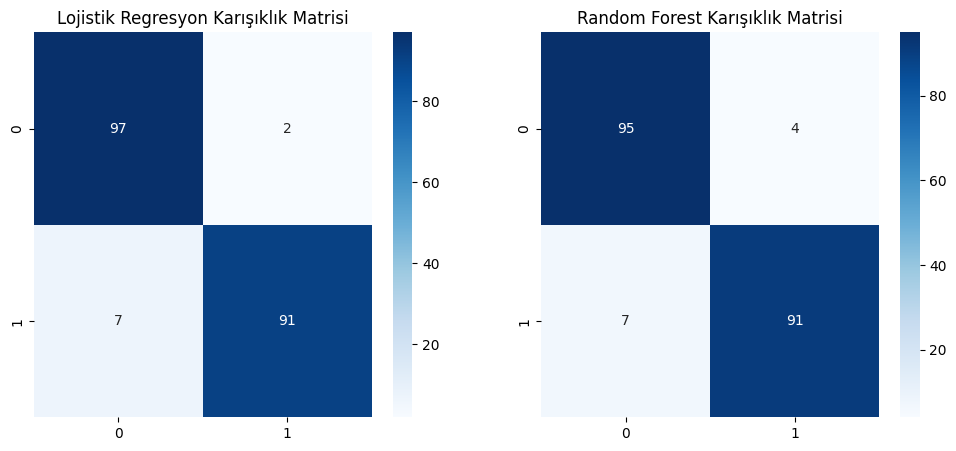

In [8]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Lojistik Regresyon Karƒ±≈üƒ±klƒ±k Matrisi')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Karƒ±≈üƒ±klƒ±k Matrisi')
plt.show()

# üìå 9. Precision-Recall Eƒürisi
Veri seti dengesiz olduƒüunda Precision-Recall eƒürisi, model ba≈üarƒ±mƒ±nƒ± ROC eƒürisine g√∂re daha etkili g√∂sterebilir.

Bu b√∂l√ºmde, her iki modelin:

* Precision-Recall eƒürileri √ßizilmi≈ü,

* Eƒüri altƒ±ndaki alan (AP - Average Precision) hesaplanmƒ±≈ütƒ±r.

Grafikler, modellerin √∂zellikle dolandƒ±rƒ±cƒ±lƒ±k sƒ±nƒ±fƒ±nƒ± ne kadar ba≈üarƒ±lƒ± tespit ettiƒüini anlamamƒ±za yardƒ±mcƒ± olur.

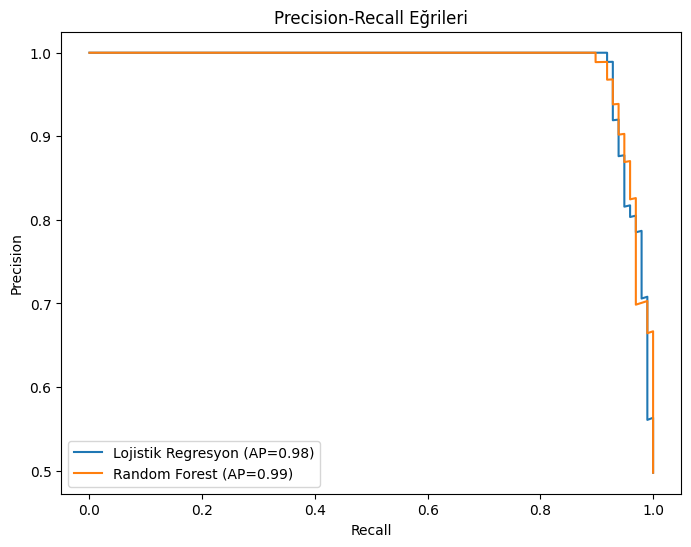

In [9]:
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label=f'Lojistik Regresyon (AP={auc(recall_lr, precision_lr):.2f})')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP={auc(recall_rf, precision_rf):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Eƒürileri')
plt.legend()
plt.show()

# üìå 10. BONUS: DBSCAN ile G√∂zetimsiz √ñƒürenme
Bu adƒ±mda, DBSCAN algoritmasƒ± ile g√∂zetimsiz (unsupervised) anomali tespiti yapƒ±lmƒ±≈ütƒ±r.
√ñnce PCA ile veri 2 boyuta indirgenmi≈ü, ardƒ±ndan DBSCAN ile k√ºmeler belirlenmi≈ütir.

cluster = -1 olan √∂rnekler anomali olarak deƒüerlendirilmi≈ütir.
Sonu√ßlara g√∂re:

* 270 anomali tespit edilmi≈ütir.

* Bunlarƒ±n %95‚Äôi ger√ßekten dolandƒ±rƒ±cƒ±lƒ±k vakasƒ±dƒ±r.

Bu analiz, etiketlenmemi≈ü verilerde de dolandƒ±rƒ±cƒ±lƒ±ƒüƒ± tespit edebilme potansiyelini ortaya koymaktadƒ±r.

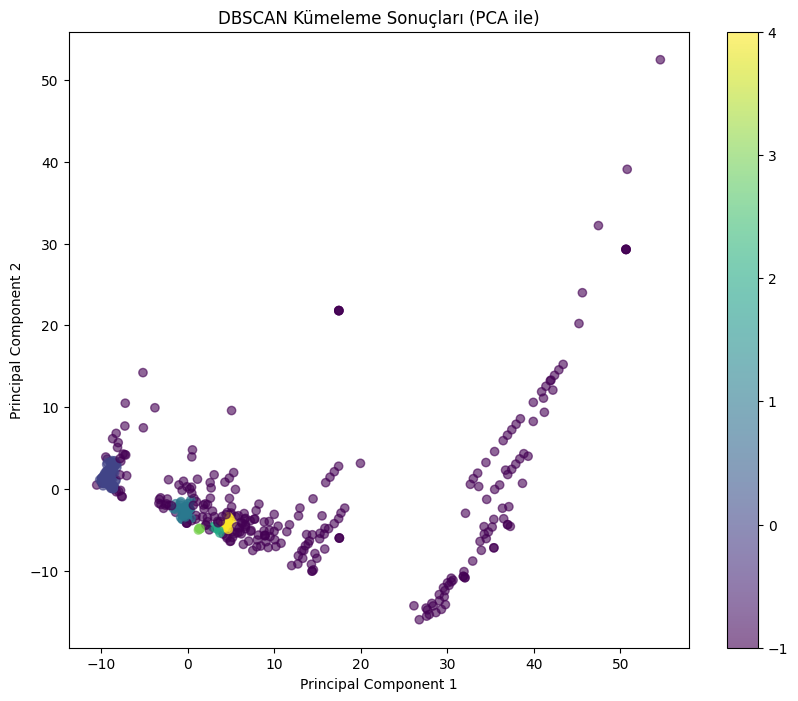


Toplam 270 anomali tespit edildi.

Anomalilerin Ger√ßek Sƒ±nƒ±f Daƒüƒ±lƒ±mƒ±:
Class
1    257
0     13
Name: count, dtype: int64


In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_pca)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('DBSCAN K√ºmeleme Sonu√ßlarƒ± (PCA ile)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Anomali analizi
anomalies = X_train[clusters == -1]
print(f"\nToplam {len(anomalies)} anomali tespit edildi.")
if len(anomalies) > 0:
    anomaly_labels = y_train.loc[anomalies.index]
    print("\nAnomalilerin Ger√ßek Sƒ±nƒ±f Daƒüƒ±lƒ±mƒ±:")
    print(anomaly_labels.value_counts())

# üßæ Sonu√ß ve Yorum 
Bu proje kapsamƒ±nda yapƒ±lan analizler ve uygulanan makine √∂ƒürenmesi modelleri sonucunda, hem Lojistik Regresyon hem de Random Forest algoritmalarƒ±nƒ±n, sƒ±nƒ±f dengesizliƒüine raƒümen y√ºksek doƒüruluk oranƒ± ve g√º√ßl√º ayƒ±rt edici yetenek sergilediƒüi g√∂r√ºlm√º≈üt√ºr. √ñzellikle:

Her iki modelin de ROC AUC skorlarƒ± 0.97 ve √ºzerindedir.

Azƒ±nlƒ±k sƒ±nƒ±fa (dolandƒ±rƒ±cƒ±lƒ±k) ait √∂rneklerin hatasƒ±z ya da √ßok az hatayla sƒ±nƒ±flandƒ±rƒ±lmasƒ±, modelin hedefe ula≈ütƒ±ƒüƒ±nƒ± g√∂stermektedir.

Bunun yanƒ±nda, DBSCAN gibi g√∂zetimsiz √∂ƒürenme algoritmalarƒ±yla yapƒ±lan analiz, etiketli veri bulunmadƒ±ƒüƒ±nda dahi potansiyel dolandƒ±rƒ±cƒ±lƒ±k vakalarƒ±nƒ±n ba≈üarƒ±yla tespit edilebileceƒüini g√∂stermi≈ütir. DBSCAN‚Äôin bulduƒüu 270 anomaliden 257‚Äôsinin ger√ßekten dolandƒ±rƒ±cƒ±lƒ±k olmasƒ±, bu y√∂ntemin ger√ßek d√ºnya uygulamalarƒ±nda da destekleyici bir rol oynayabileceƒüini ortaya koymaktadƒ±r.

# üîç Ger√ßek Hayattaki Uygulamalar
Finansal kurumlar, bu tarz modelleri kullanarak ger√ßek zamanlƒ± dolandƒ±rƒ±cƒ±lƒ±k tespiti sistemleri olu≈üturabilir.

ƒ∞nsan denetimini minimize ederek, y√ºksek hacimli i≈ülemler arasƒ±nda anormallikleri otomatik olarak ayƒ±klayabilirler.

# üöÄ Projenin Geli≈ütirme Potansiyeli
Daha b√ºy√ºk ve g√ºncel veri setleriyle test edilerek genelleme yeteneƒüi artƒ±rƒ±labilir.

SMOTE gibi geli≈ümi≈ü yeniden √∂rnekleme teknikleri veya XGBoost gibi farklƒ± modeller denenebilir.

Model, bir web uygulamasƒ±na entegre edilerek kullanƒ±cƒ± dostu bir aray√ºz √ºzerinden eri≈üilebilir hale getirilebilir.

Bu proje, hem g√∂zetimli hem de g√∂zetimsiz √∂ƒürenme tekniklerinin kritik sƒ±nƒ±flandƒ±rma problemlerinde nasƒ±l etkili bi√ßimde kullanƒ±labileceƒüini g√∂stermektedir. Aynƒ± zamanda ger√ßek d√ºnya problemlerine uygulanabilir, b√ºt√ºnc√ºl bir makine √∂ƒürenmesi √ß√∂z√ºm√ºn√ºn nasƒ±l geli≈ütirilebileceƒüine dair kapsamlƒ± bir √∂rnektir.